## Установка Keras Tuner

In [2]:
pip install -U keras-tuner

     |████████████████████████████████| 133 kB 4.7 MB/s 


## Подключаем нужные пакеты

In [3]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import regularizers


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [4]:
from google.colab import files
files.upload()

Saving DataSet_1.csv to DataSet_1.csv
Saving DataSet_2.csv to DataSet_2.csv


{'DataSet_1.csv': b'"","\xd0\xa1\xd0\xbe\xd0\xbe\xd1\x82\xd0\xbd\xd0\xbe\xd1\x88\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xb5 \xd0\xbc\xd0\xb0\xd1\x82\xd1\x80\xd0\xb8\xd1\x86\xd0\xb0-\xd0\xbd\xd0\xb0\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbd\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8c","\xd0\x9f\xd0\xbb\xd0\xbe\xd1\x82\xd0\xbd\xd0\xbe\xd1\x81\xd1\x82\xd1\x8c, \xd0\xba\xd0\xb3/\xd0\xbc3","\xd0\xbc\xd0\xbe\xd0\xb4\xd1\x83\xd0\xbb\xd1\x8c \xd1\x83\xd0\xbf\xd1\x80\xd1\x83\xd0\xb3\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8, \xd0\x93\xd0\x9f\xd0\xb0","\xd0\x9a\xd0\xbe\xd0\xbb\xd0\xb8\xd1\x87\xd0\xb5\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe \xd0\xbe\xd1\x82\xd0\xb2\xd0\xb5\xd1\x80\xd0\xb4\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd1\x8f, \xd0\xbc.%","\xd0\xa1\xd0\xbe\xd0\xb4\xd0\xb5\xd1\x80\xd0\xb6\xd0\xb0\xd0\xbd\xd0\xb8\xd0\xb5 \xd1\x8d\xd0\xbf\xd0\xbe\xd0\xba\xd1\x81\xd0\xb8\xd0\xb4\xd0\xbd\xd1\x8b\xd1\x85 \xd0\xb3\xd1\x80\xd1\x83\xd0\xbf\xd0\xbf,%_2","\xd0\xa2\xd0\xb5\xd0\xbc\xd0\xbf\xd0\xb5\xd1\x80\xd0\xb0\xd1\x82\xd1\x83\xd1\x80\xd0\xb0 \xd0

In [5]:
df_1 = pd.read_csv('DataSet_1.csv')
df_2 = pd.read_csv('DataSet_2.csv')

In [6]:
df_3=pd.merge(df_1,df_2)

In [7]:
DataSet=df_3.drop('Unnamed: 0', axis=1)

In [8]:
DataSet

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [9]:
DataSet_target=DataSet[['Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]

**Построим нейросеть для прогнозирования параметра матрица-наполнитель**

In [10]:
Y = np.array(DataSet['Соотношение матрица-наполнитель'])
X = DataSet_target.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [11]:
#Среднее значение
mean = X_train.mean(axis=0)
# Стандартное отклонение
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

## Подготовка данных для обучения сети

## Задаем функцию создания нейронной сети

In [12]:
from keras.backend import dropout
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])    
    model.add(Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=64,    # минимальное количество нейронов - 128
                                   max_value=1024,   # максимальное количество - 1024
                                   step=32),
                  input_shape=(X_train.shape[1],),
                    activation=activation_choice,
                  ))
    
    model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=64,   
                                   max_value=1024,   
                                   step=32),
                    activation=activation_choice,
                   ))   
    
    
    model.add(Dense(units=hp.Int('units_hidden',        
                                   min_value=64,   
                                   max_value=1024,   
                                   step=32),
                    activation=activation_choice))  
    
    
  
    
    
    
    model.add(Dense(1))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']),
        loss='mse',
        metrics=['mae'])
    return model

## Создаем tuner

Доступные типы тюнеров: 
- RandomSearch - случайный поиск.
- Hyperband - алгоритм оптимизации на основе многорукого бандита, Li, Lisha, and Kevin Jamieson. ["Hyperband: A Novel Bandit-Based Approach to Hyperparameter Optimization."Journal of Machine Learning Research 18 (2018): 1-52](http://jmlr.org/papers/v18/16-558.html).
- BayesianOptimization - [байесовская оптимизация](https://en.wikipedia.org/wiki/Bayesian_optimization).

In [13]:
tuner = RandomSearch(
    build_model,                 # функция создания модели
    objective='mae',    # метрика, которую нужно оптимизировать - 
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=65,               # максимальное количество запусков обучения 
    directory='test_directory'   # каталог, куда сохраняются обученные сети  
    )

## Запускаем подбор гиперпараметров

Пространство поиска

In [14]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 1024, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


Подбор гиперпараметров

In [15]:
tuner.search(X_train,                  # Данные для обучения
             y_train,                  # Правильные ответы
             batch_size=250,           # Размер мини-выборки
             epochs=100,                # Количество эпох обучения 
             validation_split=0.1,     # Часть данных, которая будет использоваться для проверки
             )

Trial 65 Complete [00h 00m 10s]
mae: 0.7139953374862671

Best mae So Far: 0.019845252856612206
Total elapsed time: 00h 10m 42s
INFO:tensorflow:Oracle triggered exit


## Выбираем лучшую модель

In [16]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: relu
units_input: 256
units_hidden: 992
optimizer: adam
Score: 0.019845252856612206
Trial summary
Hyperparameters:
activation: relu
units_input: 416
units_hidden: 896
optimizer: adam
Score: 0.0349203385412693
Trial summary
Hyperparameters:
activation: relu
units_input: 416
units_hidden: 1024
optimizer: adam
Score: 0.046944912523031235
Trial summary
Hyperparameters:
activation: relu
units_input: 352
units_hidden: 576
optimizer: adam
Score: 0.048791781067848206
Trial summary
Hyperparameters:
activation: relu
units_input: 832
units_hidden: 672
optimizer: adam
Score: 0.055746037513017654
Trial summary
Hyperparameters:
activation: relu
units_input: 512
units_hidden: 608
optimizer: adam
Score: 0.05658695101737976
Trial summary
Hyperparameters:
activation: relu
units_input: 256
units_hidden: 544
optimizer: adam
Score: 0.05864104628562927
Trial summary
Hyperparameters:
a

Получаем три лучших модели

In [17]:
models = tuner.get_best_models(num_models=3)

Оцениваем качество модели на тестовых данных

In [18]:
for model in models:
  model.summary()
  model.evaluate(X_test,  y_test)
  model.evaluate(X_train, y_train)
  print() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 992)               254944    
                                                                 
 dense_2 (Dense)             (None, 992)               985056    
                                                                 
 dense_3 (Dense)             (None, 1)                 993       
                                                                 
Total params: 1,243,809
Trainable params: 1,243,809
Non-trainable params: 0
_________________________________________________________________
26/26 [==============================] - 0s 3ms/step - loss: 0.1368 - mae: 0.1036

Model: "sequential"
_________________________________________________________________
 Layer (t

In [19]:
for model in models:
  model.evaluate(X_test,  y_test)
  model.evaluate(X_train, y_train)
  

26/26 [==============================] - 0s 3ms/step - loss: 0.1447 - mae: 0.1356


In [20]:
model = models[0]

In [21]:
 model.evaluate(X_test,  y_test)
 model.evaluate(X_train, y_train)

26/26 [==============================] - 0s 3ms/step - loss: 0.1368 - mae: 0.1036


[0.13678058981895447, 0.1035795509815216]

In [22]:
pred_test = model.predict(X_test)

In [23]:
pred_train = model.predict(X_train)

In [24]:
y_test=y_test.reshape((205,1))

In [25]:
y_train=y_train.reshape((818,1))

In [26]:
print("Предсказанное значение:", pred_test[0], ", истинное значение :", y_test[0])

Предсказанное значение: [3.8957214] , истинное значение : [3.79005127]


In [27]:
print("Предсказанное значение:", pred_test[1], ", истинное значение :", y_test[1])

Предсказанное значение: [1.735823] , истинное значение : [2.66126713]


In [28]:
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
test_r2 =  r2_score(y_test,pred_test)
train_r2 =  r2_score(y_train,pred_train)


In [48]:
print("Test r^2: {}".format(test_r2))

Test r^2: -0.742912480048417


In [50]:
print("Train ^r2: {}".format(train_r2))

Train ^r2: 0.8324559759106198


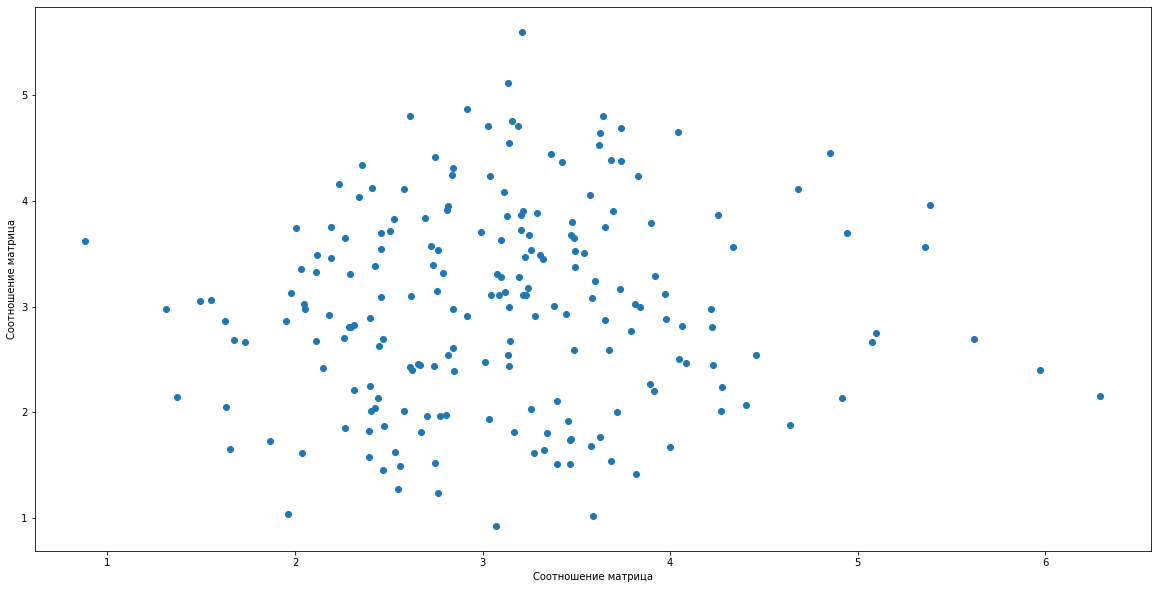

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(pred_test, y_test)
plt.xlabel("Соотношение матрица")
plt.ylabel("Соотношение матрица")
plt.show()

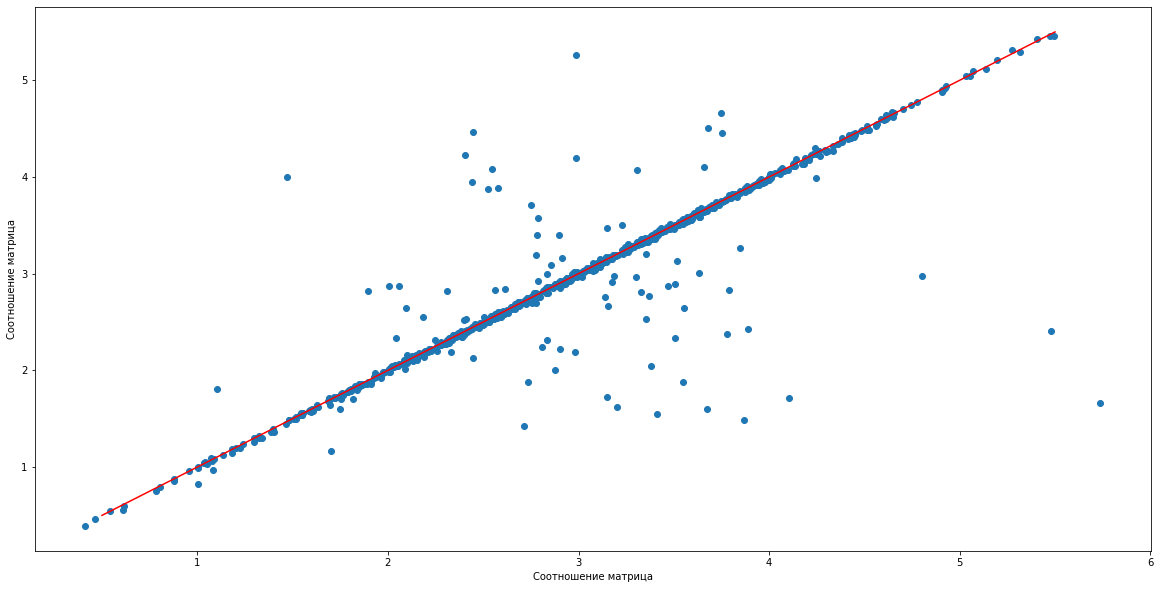

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(pred_train, y_train)
plt.xlabel("Соотношение матрица")
plt.ylabel("Соотношение матрица")
plt.plot([0.5, 5.5], [0.5, 5.5], color="red")
plt.show()

In [43]:
history = model.fit(X_train, y_train, batch_size=250, epochs=100, validation_split=0.1)

Epoch 1/100
3/3 [==============================] - 0s 65ms/step - loss: 0.0022 - mae: 0.0343 - val_loss: 1.2725 - val_mae: 0.8623
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 1.2707 - val_mae: 0.8620
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0016 - mae: 0.0313 - val_loss: 1.2894 - val_mae: 0.8629
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 1.2770 - val_mae: 0.8583
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0012 - mae: 0.0276 - val_loss: 1.2750 - val_mae: 0.8631
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0010 - mae: 0.0245 - val_loss: 1.2875 - val_mae: 0.8656
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 6.9086e-04 - mae: 0.0209 - val_loss: 1.2741 - val_mae: 0.8590
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 6.6924e-04 - m

In [44]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

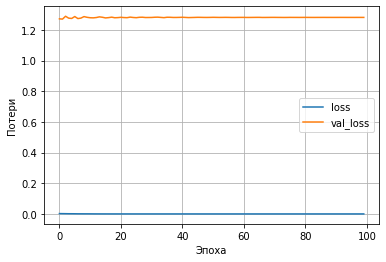

In [45]:
plot_loss(history)